In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_excel('./Cr-poisoning.xlsx')

In [53]:
df.head(10)

,log pO2 /bar,log CrO3 /bar,reaction product
0,-1.66,-22.0,SrO
1,-1.66,-18.5,SrCrO4
2,-4.00,-18.5,Sr3Cr2O8
3,-3.70,-17.2,SrCrO4
4,-7.80,-18.5,Sr3Cr2O8
5,-8.10,-17.0,SrCrO3
6,-8.50,-18.0,SrCrO3
7,-9.00,-21.0,SrO
8,-9.50,-21.0,Sr2CrO4
9,-7.50,-19.9,Sr2CrO4


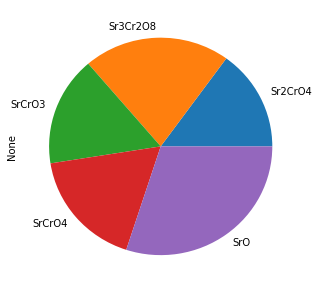

In [54]:
df.groupby(by = 'reaction product').size().plot(kind = 'pie', figsize = (5,5))

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
array_scaler = scaler.fit_transform(df[["log pO2 /bar",'log CrO3 /bar']])
#np.mean(X_train), np.std(X_train)


df_scaler = pd.DataFrame(array_scaler)
df = pd.concat([df_scaler,df['reaction product']],axis=1)

In [64]:
from random import sample
idx = sample(list(df.index), int(df.shape[0] * 0.7))
df_train, df_test = df.ix[idx], df.drop(idx)

e:\miniconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
X_train = np.array(df_train)
X_test = np.array(df_test)
print (np.shape (X_train))
print (np.shape (X_test))

(56, 3)
(24, 3)


e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
e:\miniconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


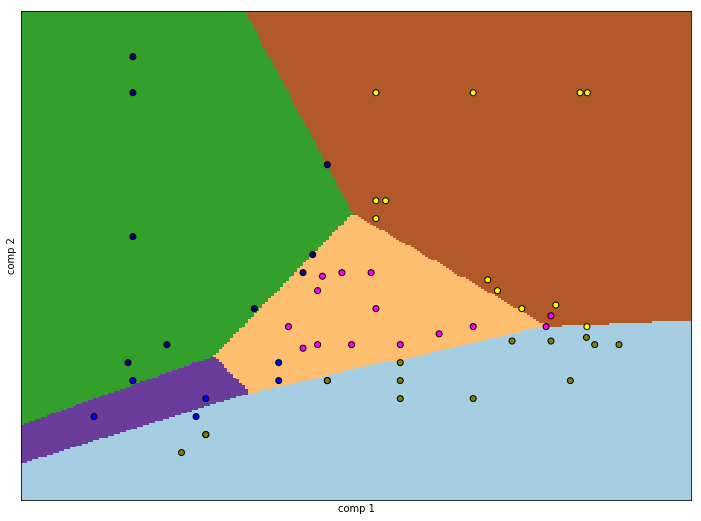

In [66]:
from sklearn import linear_model
h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train[:, :2], np.array(X_train[:, 2:], dtype = np.str))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max  = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# pd.set_option('display.max_columns', None)#显示pandas完整数据
# pd.set_option('display.max_rows', None)
#print (pd.DataFrame(Z))


# Put the result into a color plot
encoder = {'SrO': 1, 'SrCrO3': 2, 'Sr3Cr2O8': 3,'Sr2CrO4':4,'SrCrO4':5}
Z = np.array([encoder[z] for z in Z]).reshape(xx.shape)
plt.figure(figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
col_map = {'SrO': 'olive', 'SrCrO3': 'navy', 'Sr3Cr2O8': 'magenta','Sr2CrO4':"blue",'SrCrO4':"yellow"}
plt.scatter(X_train[:, 0], X_train[:, 1], c= [col_map[lb] for lb in df["reaction product"].ix[idx]], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('comp 1')
plt.ylabel('comp 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [67]:
from sklearn.metrics import accuracy_score
print("Test data accuracy of logistic regression: %s%%" % (100*accuracy_score(y_validation,y_pred_default)))